## Individual Coding Assignment
Direction : Be pragramtic: combine elements from various labs to create unique outputs that specifically advance your research inquiry

I'm conducting an exploratory analysis for the other datasets we've found but haven't had a chance to look in to! I'm just going to see where they lead and if there's any overlap I can consider with the census data from last week.  

I'm most focusing on cleaning two large datasets and going back and forth which actually was confusing and not ideal to do going forward. It made me waste a lot of time because I would forget which dataset I was working with. 

Importing libraries and reading in data

In [7]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

afford = gpd.read_file('HCIDLA Affordable Housing Projects(2003-Present).geojson')
enviro = pd.read_excel ('CAenviroScore.xlsx')


In [8]:
afford.shape

(503, 35)

In [9]:
enviro.shape

(8035, 57)

In [10]:
afford.head()

,site_units,tax_exempt_conduit_bond,community,contract_url,development_stage,name,location,leverage,latitude,photo,...,contract_numbers,address,apn,project_total_units,housing_type,management_company,supportive_housing,council_district,tdc,geometry
0,0,10247566,CENTRAL,None,In-Service,LEXINGTON APARTMENTS A/B (SITE 11),0xE6100000010C3B3602F1BA024140F5A10BEA5B905DC0,6771719,34.02133,click here (http://hcidapp.lacity.org/mpphotos...,...,None,"1145 E 24TH ST Los Angeles, CA 90011",5131020009,251,FAMILY,"ALPHA PROPERTY MANAGEMENT, INC.",No,9,17019285,POINT (-118.25561 34.02133)
1,8,4641342,CENTURY PALMS/COVE,None,In-Service,WINDWARD APTS (A/B) (SITE 14),0xE6100000010C4E0B5EF415F8404069A9BC1DE1905DC0,7438473,33.93817,click here (http://hcidapp.lacity.org/mpphotos...,...,None,"636 E 108TH ST 1-4 Los Angeles, CA 90059",6071001013,232,FAMILY,"ALPHA PROPERTY MANAGEMENT, INC.",No,8,12079815,POINT (-118.26374 33.93817)
2,16,0,HOLLYWOOD,https://hcidapp.lacity.org/citycontractref/def...,In-Service,BRICKER,0xE6100000010C7008556AF60C4140A774B0FECF935DC0,6465419,34.10127,click here (http://hcidapp.lacity.org/mpphotos...,...,C-111304 (https://hcidapp.lacity.org/citycontr...,"1671 N WESTERN AVE Los Angeles, CA 90028",5544025033,16,SENIORS,BARKER MANAGEMENT INCORPORATED,No,13,7093297,POINT (-118.30957 34.10127)
3,20,6787000,UNIVERSITY PARK,None,In-Service,HDR I & II (SITE 4),0xE6100000010C959A3DD00A044140AE0D15E3FC915DC0,8116043,34.03158,click here (http://hcidapp.lacity.org/mpphotos...,...,None,"2375 S SCARFF ST Los Angeles, CA 90007",5124011008,125,FAMILY,PK MANAGEMENT,No,1,14903043,POINT (-118.28106 34.03158)
4,16,0,KOREATOWN,https://hcidapp.lacity.org/citycontractref/def...,In-Service,ALEXANDRIA HOUSE APTS.,0xE6100000010C8E23D6E253084140931804560E935DC0,5928306,34.06506,click here (http://hcidapp.lacity.org/mpphotos...,...,C-114811 (https://hcidapp.lacity.org/citycontr...,"510 S ALEXANDRIA AVE 1-20 Los Angeles, CA 90020",5502020005,16,SPECIAL NEEDS,BARKER MANAGEMENT INC.,Yes,10,6728306,POINT (-118.29775 34.06506)


I am just getting a summary of what the dfs include

In [11]:
enviro.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752


Getting a plot to display where the data points were captured

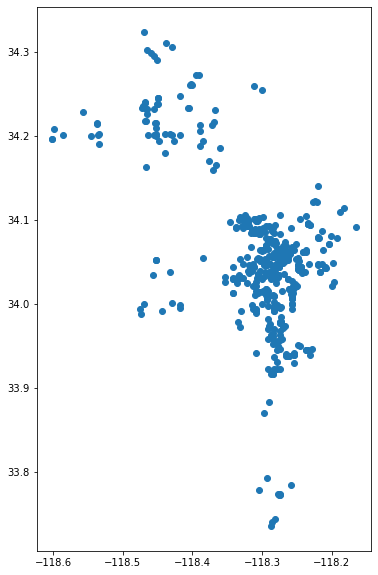

In [12]:
afford.plot(figsize = (10,10))

In [17]:
afford.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   site_units                 503 non-null    object  
 1   tax_exempt_conduit_bond    503 non-null    object  
 2   community                  502 non-null    object  
 3   contract_url               346 non-null    object  
 4   development_stage          503 non-null    object  
 5   name                       503 non-null    object  
 6   location                   503 non-null    object  
 7   leverage                   503 non-null    object  
 8   latitude                   503 non-null    object  
 9   photo                      503 non-null    object  
 10  contract_number_hyperlink  346 non-null    object  
 11  project_number             503 non-null    object  
 12  developer                  503 non-null    object  
 13  date_stamp                 

In [18]:
enviro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

I'm getting a look at the contents of the variables

In [19]:
list(afford)

['site_units',
 'tax_exempt_conduit_bond',
 'community',
 'contract_url',
 'development_stage',
 'name',
 'location',
 'leverage',
 'latitude',
 'photo',
 'contract_number_hyperlink',
 'project_number',
 'developer',
 'date_stamp',
 'contract_link_html_url',
 'hcidla_funded',
 'gps_coords',
 'longitude',
 'site_cd',
 'reporturl2',
 'contact_phone',
 'date_funded',
 'construction_type',
 'in_service_date',
 'jobs',
 'contract_numbers',
 'address',
 'apn',
 'project_total_units',
 'housing_type',
 'management_company',
 'supportive_housing',
 'council_district',
 'tdc',
 'geometry']

In [20]:
list(enviro)

['Census Tract',
 'Total Population',
 'California County',
 'ZIP',
 'Nearby City \n(to help approximate location only)',
 'Longitude',
 'Latitude',
 'CES 3.0 Score',
 ' CES 3.0 Percentile',
 'CES 3.0 \nPercentile Range',
 'SB 535 Disadvantaged Community',
 'Ozone',
 'Ozone Pctl',
 'PM2.5',
 'PM2.5 Pctl',
 'Diesel PM',
 'Diesel PM Pctl',
 'Drinking Water',
 'Drinking Water Pctl',
 'Pesticides',
 'Pesticides Pctl',
 'Tox. Release',
 'Tox. Release Pctl',
 'Traffic',
 'Traffic Pctl',
 'Cleanup Sites',
 'Cleanup Sites Pctl',
 'Groundwater Threats',
 'Groundwater Threats Pctl',
 'Haz. Waste',
 'Haz. Waste Pctl',
 'Imp. Water Bodies',
 'Imp. Water Bodies Pctl',
 'Solid Waste',
 'Solid Waste Pctl',
 'Pollution Burden',
 'Pollution Burden Score',
 'Pollution Burden Pctl',
 'Asthma',
 'Asthma Pctl',
 'Low Birth Weight',
 'Low Birth Weight Pctl',
 'Cardiovascular Disease',
 'Cardiovascular Disease Pctl',
 'Education',
 'Education Pctl',
 'Linguistic Isolation',
 'Linguistic Isolation Pctl',
 'Po

I am extracting location related info and the CES scores info. the left out variables to my understanding are accounted for in the CES score

In [21]:
ecol = ['Census Tract',
 'Total Population',
 'California County',
 'ZIP',
 'Nearby City \n(to help approximate location only)',
 'Longitude',
 'Latitude',
 'CES 3.0 Score',
 ' CES 3.0 Percentile',
 'CES 3.0 \nPercentile Range',
 'SB 535 Disadvantaged Community']

I'm subsetting to the relevant variables

In [22]:
env = enviro[ecol]

In [23]:
env.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),Yes
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),Yes
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),Yes
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),Yes
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),Yes


In [27]:
acol = ['site_units',
 'community',
 'name',
 'leverage',
 'latitude',
 'project_number',
 'hcidla_funded',
 'gps_coords',
 'longitude',
 'date_funded',
 'construction_type',
 'in_service_date',
 'address',
 'project_total_units',
 'housing_type']

In [28]:
aff = afford[acol]

In [29]:
aff.head()

,site_units,community,name,leverage,latitude,project_number,hcidla_funded,gps_coords,longitude,date_funded,construction_type,in_service_date,address,project_total_units,housing_type
0,0,CENTRAL,LEXINGTON APARTMENTS A/B (SITE 11),6771719,34.02133,05-117217,0,"(34.02133,-118.25561)",-118.25561,2005-12-28T00:00:00,REHAB,2006,"1145 E 24TH ST Los Angeles, CA 90011",251,FAMILY
1,8,CENTURY PALMS/COVE,WINDWARD APTS (A/B) (SITE 14),7438473,33.93817,06-117222,0,"(33.93817,-118.26374)",-118.26374,2006-04-01T00:00:00,REHAB,2007,"636 E 108TH ST 1-4 Los Angeles, CA 90059",232,FAMILY
2,16,HOLLYWOOD,BRICKER,6465419,34.10127,60057,627878,"(34.10127,-118.30957)",-118.30957,2007-02-24T00:00:00,ACQUISITION + REHAB,2011,"1671 N WESTERN AVE Los Angeles, CA 90028",16,SENIORS
3,20,UNIVERSITY PARK,HDR I & II (SITE 4),8116043,34.03158,07-117233,0,"(34.03158,-118.28106)",-118.28106,2007-07-01T00:00:00,REHAB,2008,"2375 S SCARFF ST Los Angeles, CA 90007",125,FAMILY
4,16,KOREATOWN,ALEXANDRIA HOUSE APTS.,5928306,34.06506,80050,800000,"(34.06506,-118.29775)",-118.29775,2008-11-21T00:00:00,REHAB,2010,"510 S ALEXANDRIA AVE 1-20 Los Angeles, CA 90020",16,SPECIAL NEEDS


I need to restrict the California environmental score data to only use LA county observations

In [62]:
enla = env.loc[(env['California County'] == 'Los Angeles')  & (env['CES 3.0 Score'] > 0) ]

Let the df be restricted to only LA county and only include rows with CES 3.0 Score values 

In [63]:
enla.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community
5,6037204920,2598,Los Angeles,90023,Los Angeles,-118.197497,34.017500,80.726872,99.936940,95-100% (highest scores),Yes
8,6037206050,2146,Los Angeles,90023,Los Angeles,-118.224453,34.029904,79.025293,99.899105,95-100% (highest scores),Yes
14,6037205120,3618,Los Angeles,90023,Los Angeles,-118.211796,34.018755,78.043685,99.823433,95-100% (highest scores),Yes
16,6037291220,3353,Los Angeles,90247,Gardena,-118.286709,33.877139,77.497763,99.798209,95-100% (highest scores),Yes
20,6037239202,4724,Los Angeles,90001,Los Angeles,-118.264977,33.985678,76.043426,99.747761,95-100% (highest scores),Yes


In [64]:
aff.shape

(503, 15)

In [65]:
enla.shape

(2298, 11)

The above are the subsetted dataframes

In [66]:
enla_sorted = enla.sort_values(by='Total Population',ascending = False)
enla_sorted

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community
6152,6037901004,12544,Los Angeles,93536,Lancaster,-118.208028,34.686240,13.992721,22.411401,20-25%,No
5225,6037910705,11415,Los Angeles,93552,Palmdale,-118.017315,34.569702,18.315818,34.102661,30-35%,No
6408,6037901205,10466,Los Angeles,93536,Lancaster,-118.275994,34.678404,12.606339,19.182747,15-20%,No
4328,6037702901,8866,Los Angeles,90292,Marina del Rey,-118.453229,33.981510,23.116446,45.415563,45-50%,No
4512,6037900803,8284,Los Angeles,93534,Lancaster,-118.156990,34.712756,22.064728,43.094968,40-45%,No
...,...,...,...,...,...,...,...,...,...,...,...
101,6037572800,839,Los Angeles,90810,Long Beach,-118.221209,33.795296,66.794707,98.726195,95-100% (highest scores),Yes
6803,6037800331,766,Los Angeles,91362,Thousand Oaks,-118.799826,34.157272,10.488752,14.201034,10-15%,No
3809,6037930200,546,Los Angeles,91342,Sylmar,-118.289431,34.338793,26.044108,51.961155,50-55%,No
5949,6037920033,515,Los Angeles,91351,Canyon Country,-118.432614,34.459628,14.935932,24.971623,20-25%,No


I am getting an idea of the population at the census tracts

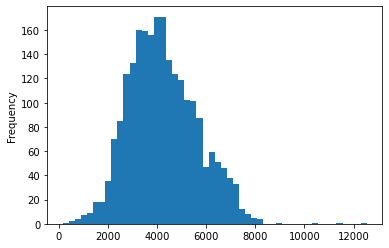

In [67]:
enla['Total Population'].plot.hist(bins =50)

AttributeError: 'Line2D' object has no property 'column'

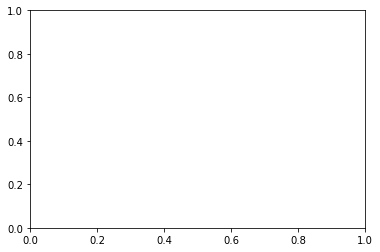

In [68]:
enla.plot(column = 'CES 3.0 Score')


I'm stuck here because the dataframe won't subset how I like. I tried a double subset for the df.